In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import time
%matplotlib inline
import trap_util as tu
from trap_util import trap
from trap_util import quarter_trap
from trap_util import half_trap
# physical parameters
q = -1.60217662e-19 # coulombs
m = 9.10938356e-31 #kg (electron)
#m = 6.6359437706294e-26 #(calcium)
kB = 1.38064852e-23 # J/K
f = 1.5e9 # Electrode frequency, in Hertz

### Note that the data is only a quarter of the plane. In order to get the E field data of the whole plane, i need to mirror the data to the other three quadrants to get the full information.

In [2]:
# loading E field (vector)
data = np.loadtxt("etrap_65V_1p5GHz_realsmoothExEy_250nm_30passes_quarter.fld", skiprows = 2)

In [3]:
# manipulating E field data
df = pd.DataFrame(data, columns=['x', 'y', 'z', 'Ex', 'Ey', 'Ez'])
x_max, x_min = df.x.max(), df.x.min()
y_max, y_min = df.y.max(), df.y.min()
# print(x_max, x_min, y_max, y_min)
# print(df.y.nunique())
Nx, Ny = df.x.nunique() - 1, df.y.nunique() - 1 # numbers of intervals that divide each dimension
dx, dy = (x_max-x_min)/Nx, (y_max-y_min)/Ny # interval size
print("x_max = ", x_max*1.0e3, "mm")
print("y_max = ", y_max*1.0e3, "mm")
print("x_min = ", x_min*1.0e3, "mm")
print("y_min = ", y_min*1.0e3, "mm")
print("spatial resolution x: ", dx*1.0e6, "um")
print("spatial resolution y: ", dy*1.0e6, "um")

x_max =  1.0 mm
y_max =  1.5 mm
x_min =  0.0 mm
y_min =  0.0 mm
spatial resolution x:  0.25 um
spatial resolution y:  0.25 um


In [4]:
trap_RF = quarter_trap(df, x_max, x_min, y_max, y_min, Nx, Ny, dx, dy, f=f) 

In [5]:
n = trap_RF.get_row_index(0.25e-6, 0)
trap_RF.df.iloc[n, :]

x     2.500000e-07
y     0.000000e+00
z     0.000000e+00
Ex   -2.720086e+01
Ey   -6.088934e-02
Ez    0.000000e+00
Name: 6001, dtype: float64

## Single Particle Simulation

Out of bound
x_max =  1000.0 um
y_max =  1500.0 um
x_min =  0.0 um
y_min =  0.0 um
spatial resolution x:  0.25 um
spatial resolution y:  0.25 um
Time step for simulation:  0.01 ns
time: 6126.8051862716675


Text(0, 0.5, 'y (um)')

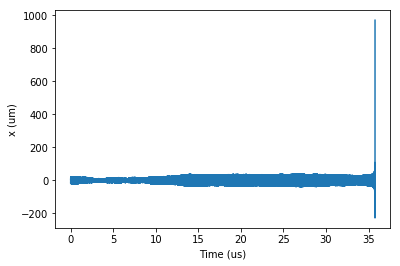

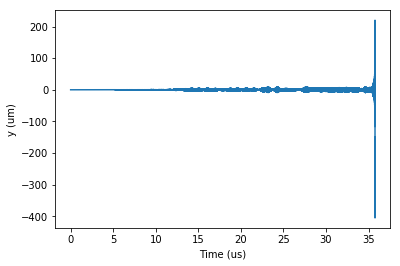

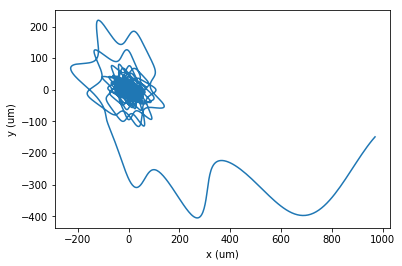

In [8]:
start = time.time()
# simulation configuration
dt = 1.0e-11 #s
t_max = 100.0e-6 # maximum time duration of the simulation

T = 20.0 # kelvin
rou = 5.0e-6 # distance from initial position to the trap center
phi = 0.0 # direction of initial position vector
v = np.sqrt(2*kB*T/m) #speed
theta = 0.0 # direction of initial velocity

result = trap_RF.traj(rou, phi, v, theta, dt, t_max)
t_s = np.array(result[0])
x_traj = np.array(result[1])
y_traj = np.array(result[2])

print("x_max = ", x_max*1.0e6, "um")
print("y_max = ", y_max*1.0e6, "um")
print("x_min = ", x_min*1.0e6, "um")
print("y_min = ", y_min*1.0e6, "um")
print("spatial resolution x: ", dx*1.0e6, "um")
print("spatial resolution y: ", dy*1.0e6, "um")
print("Time step for simulation: ", dt*1.0e9, "ns")
end = time.time()
print("time:", end-start)

plt.figure()
plt.plot(t_s*1.0e6, x_traj*1.0e6)
plt.xlabel("Time (us)")
plt.ylabel("x (um)")

plt.figure()
plt.plot(t_s*1.0e6, y_traj*1.0e6)
plt.xlabel("Time (us)")
plt.ylabel("y (um)")

plt.figure()
plt.plot(x_traj*1.0e6, y_traj*1.0e6)
plt.xlabel("x (um)")
plt.ylabel("y (um)")

## 300K t_max dependence

In [7]:
N = 200
T = 300.0
dt = 1.0e-11
FWHM = 50.0e-6
t_max_dependence= dict()
error_t_max_dependence = dict()
for t_max in [5.0e-8, 20.0e-8, 40.0e-8]:
    trap_rate = 0
    result_list = trap_RF.Boltzmann_sim(N, T, dt, t_max, FWHM)
    trap_rate = sum(result_list)/N
    error_trap_rate = np.std(result_list)/np.sqrt(N)
    t_max_dependence[t_max] = trap_rate
    error_t_max_dependence[t_max] = error_trap_rate

1  ion samples already simulated
21  ion samples already simulated
41  ion samples already simulated
61  ion samples already simulated
81  ion samples already simulated
101  ion samples already simulated
121  ion samples already simulated
141  ion samples already simulated
161  ion samples already simulated
181  ion samples already simulated
T:  300.0 Kelvin
N_samples:  200
Time step:  0.01 ns
Max Sim Time:  0.049999999999999996 us
FWHM:  50.0 um
Trapping Rate:  0.64 +/- 0.03394112549695428
------
1  ion samples already simulated
21  ion samples already simulated
41  ion samples already simulated
61  ion samples already simulated
81  ion samples already simulated
101  ion samples already simulated
121  ion samples already simulated
141  ion samples already simulated
161  ion samples already simulated
181  ion samples already simulated
T:  300.0 Kelvin
N_samples:  200
Time step:  0.01 ns
Max Sim Time:  0.19999999999999998 us
FWHM:  50.0 um
Trapping Rate:  0.225 +/- 0.02952752952754429
-

In [11]:
N = 200
T = 300.0
dt = 1.0e-11
FWHM = 50.0e-6
for t_max in [60.0e-8, 80.0e-8, 100.0e-8]:
    trap_rate = 0
    result_list = trap_RF.Boltzmann_sim(N, T, dt, t_max, FWHM)
    trap_rate = sum(result_list)/N
    error_trap_rate = np.std(result_list)/np.sqrt(N)
    t_max_dependence[t_max] = trap_rate
    error_t_max_dependence[t_max] = error_trap_rate

1  ion samples already simulated
21  ion samples already simulated
41  ion samples already simulated
61  ion samples already simulated
81  ion samples already simulated
101  ion samples already simulated
121  ion samples already simulated
141  ion samples already simulated
161  ion samples already simulated
181  ion samples already simulated
T:  300.0 Kelvin
N_samples:  200
Time step:  0.01 ns
Max Sim Time:  0.6 us
FWHM:  50.0 um
Trapping Rate:  0.09 +/- 0.02023610634484806
------
1  ion samples already simulated
21  ion samples already simulated
41  ion samples already simulated
61  ion samples already simulated
81  ion samples already simulated
101  ion samples already simulated
121  ion samples already simulated
141  ion samples already simulated
161  ion samples already simulated
181  ion samples already simulated
T:  300.0 Kelvin
N_samples:  200
Time step:  0.01 ns
Max Sim Time:  0.7999999999999999 us
FWHM:  50.0 um
Trapping Rate:  0.05 +/- 0.015411035007422438
------
1  ion sampl

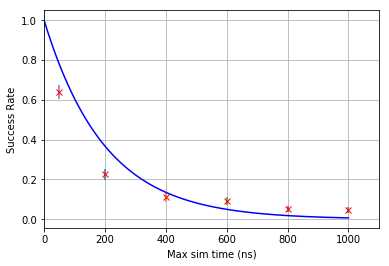

In [29]:
for i in t_max_dependence.keys():
    plt.errorbar(i * 1.0e9, t_max_dependence[i], yerr=error_t_max_dependence[i])
    plt.plot(i*1.0e9, t_max_dependence[i], "rx")
    plt.xlabel("Max sim time (ns)")
    plt.ylabel("Success Rate")
    plt.xlim(0, 1100)
    plt.grid(True)
t = np.linspace(0, 1000, 1000)
y = np.exp(-t/200.0)
plt.plot(t, y, 'b-')
    

## dt dependence for t_max = 5.0e-8

In [8]:
N = 200
T = 300.0
t_max = 5.0e-8
FWHM = 50.0e-6
dt_dependence= dict()
for dt in [1.0e-10, 5.0e-11, 1.0e-11, 5.0e-12, 1.0e-12]:
    trap_rate = 0
    result_list = trap_RF.Boltzmann_sim(N, T, dt, t_max, FWHM)
    trap_rate = np.mean(result_list)
    dt_dependence[dt] = trap_rate

1  ion samples already simulated
21  ion samples already simulated
41  ion samples already simulated
61  ion samples already simulated
81  ion samples already simulated
101  ion samples already simulated
121  ion samples already simulated
141  ion samples already simulated
161  ion samples already simulated
181  ion samples already simulated
T:  300.0 Kelvin
N_samples:  200
Time step:  0.1 ns
Max Sim Time:  0.049999999999999996 us
FWHM:  50.0 um
Trapping Rate:  0.56 +/- 0.035099857549568486
------
1  ion samples already simulated
21  ion samples already simulated
41  ion samples already simulated
61  ion samples already simulated
81  ion samples already simulated
101  ion samples already simulated
121  ion samples already simulated
141  ion samples already simulated
161  ion samples already simulated
181  ion samples already simulated
T:  300.0 Kelvin
N_samples:  200
Time step:  0.05 ns
Max Sim Time:  0.049999999999999996 us
FWHM:  50.0 um
Trapping Rate:  0.69 +/- 0.032703210851535665


## dt dependence for t_max = 20.0e-8

In [9]:
N = 200
T = 300.0
t_max = 20.0e-8
FWHM = 50.0e-6
dt_dependence= dict()
for dt in [1.0e-10, 5.0e-11, 1.0e-11, 5.0e-12, 1.0e-12]:
    trap_rate = 0
    result_list = trap_RF.Boltzmann_sim(N, T, dt, t_max, FWHM)
    trap_rate = np.mean(result_list)
    dt_dependence[dt] = trap_rate

1  ion samples already simulated
21  ion samples already simulated
41  ion samples already simulated
61  ion samples already simulated
81  ion samples already simulated
101  ion samples already simulated
121  ion samples already simulated
141  ion samples already simulated
161  ion samples already simulated
181  ion samples already simulated
T:  300.0 Kelvin
N_samples:  200
Time step:  0.1 ns
Max Sim Time:  0.19999999999999998 us
FWHM:  50.0 um
Trapping Rate:  0.225 +/- 0.029527529527544293
------
1  ion samples already simulated
21  ion samples already simulated
41  ion samples already simulated
61  ion samples already simulated
81  ion samples already simulated
101  ion samples already simulated
121  ion samples already simulated
141  ion samples already simulated
161  ion samples already simulated
181  ion samples already simulated
T:  300.0 Kelvin
N_samples:  200
Time step:  0.05 ns
Max Sim Time:  0.19999999999999998 us
FWHM:  50.0 um
Trapping Rate:  0.245 +/- 0.030411757594719844


## FWHM for 300K

In [50]:
print(T)
print(np.sqrt(2*kB*T/trap_RF.m))

300.0
95361.4171887929


In [46]:
N = 200
T = 300.0
dt = 1.0e-11
t_max = 20.0e-8
FWHM_dependence= dict()
error_FWHM_dependence = dict()
for FWHM in [5.0e-6, 10.0e-6, 20.0e-6]:
    trap_rate = 0
    result_list = trap_RF.Boltzmann_sim(N, T, dt, t_max, FWHM)
    trap_rate = sum(result_list)/N
    error_trap_rate = np.std(result_list)/np.sqrt(N)
    FWHM_dependence[FWHM] = trap_rate
    error_FWHM_dependence[FWHM] = error_trap_rate

1  ion samples already simulated
21  ion samples already simulated
41  ion samples already simulated
61  ion samples already simulated
81  ion samples already simulated
101  ion samples already simulated
121  ion samples already simulated
141  ion samples already simulated
161  ion samples already simulated
181  ion samples already simulated
T:  300.0 Kelvin
N_samples:  200
Time step:  0.01 ns
Max Sim Time:  0.19999999999999998 us
FWHM:  5.0 um
Trapping Rate:  0.285 +/- 0.03191982142807193
------
1  ion samples already simulated
21  ion samples already simulated
41  ion samples already simulated
61  ion samples already simulated
81  ion samples already simulated
101  ion samples already simulated
121  ion samples already simulated
141  ion samples already simulated
161  ion samples already simulated
181  ion samples already simulated
T:  300.0 Kelvin
N_samples:  200
Time step:  0.01 ns
Max Sim Time:  0.19999999999999998 us
FWHM:  10.0 um
Trapping Rate:  0.34 +/- 0.03349626844888845
---

## FWHM for 20K

In [6]:
N = 50
T = 20.0 #kelvin
dt = 1.0e-11
t_max = 20.0e-6
FWHM_dependence= dict()
error_FWHM_dependence = dict()
for FWHM in [5.0e-6]:
    trap_rate = 0
    result_list = trap_RF.Boltzmann_sim(N, T, dt, t_max, FWHM)
    trap_rate = sum(result_list)/N
    error_trap_rate = np.std(result_list)/np.sqrt(N)
    FWHM_dependence[FWHM] = trap_rate
    error_FWHM_dependence[FWHM] = error_trap_rate

1  ion samples already simulated
21  ion samples already simulated
41  ion samples already simulated
61  ion samples already simulated
81  ion samples already simulated
101  ion samples already simulated
121  ion samples already simulated
141  ion samples already simulated
161  ion samples already simulated
181  ion samples already simulated
T:  20.0 Kelvin
N_samples:  200
Time step:  0.01 ns
Max Sim Time:  0.19999999999999998 us
FWHM:  5.0 um
Trapping Rate:  0.98 +/- 0.009899494936611663
------
1  ion samples already simulated
21  ion samples already simulated
41  ion samples already simulated
61  ion samples already simulated
81  ion samples already simulated
101  ion samples already simulated
121  ion samples already simulated
141  ion samples already simulated
161  ion samples already simulated
181  ion samples already simulated
T:  20.0 Kelvin
N_samples:  200
Time step:  0.01 ns
Max Sim Time:  0.19999999999999998 us
FWHM:  10.0 um
Trapping Rate:  0.98 +/- 0.009899494936611663
----

In [7]:
N = 200
T = 20.0
dt = 1.0e-11
t_max = 60.0e-8
FWHM_dependence= dict()
error_FWHM_dependence = dict()
for FWHM in [5.0e-6, 10.0e-6, 20.0e-6]:
    trap_rate = 0
    result_list = trap_RF.Boltzmann_sim(N, T, dt, t_max, FWHM)
    trap_rate = sum(result_list)/N
    error_trap_rate = np.std(result_list)/np.sqrt(N)
    FWHM_dependence[FWHM] = trap_rate
    error_FWHM_dependence[FWHM] = error_trap_rate

1  ion samples already simulated
21  ion samples already simulated


KeyboardInterrupt: 

# With f = 27GHz

In [27]:
trap_high_f = quarter_trap(df, x_max, x_min, y_max, y_min, Nx, Ny, dx, dy, f=27.0e9) 

In [30]:
N = 200
T = 300.0
dt = 1.0e-11
FWHM = 50.0e-6
t_max_dependence_2 = dict()
error_t_max_dependence_2 = dict()
for t_max in [5.0e-8, 20.0e-8, 40.0e-8]:
    trap_rate = 0
    result_list = trap_high_f.Boltzmann_sim(N, T, dt, t_max, FWHM)
    trap_rate = sum(result_list)/N
    error_trap_rate = np.std(result_list)/np.sqrt(N)
    t_max_dependence_2[t_max] = trap_rate
    error_t_max_dependence_2[t_max] = error_trap_rate

1  ion samples already simulated
21  ion samples already simulated
41  ion samples already simulated
61  ion samples already simulated
81  ion samples already simulated
101  ion samples already simulated
121  ion samples already simulated
141  ion samples already simulated
161  ion samples already simulated
181  ion samples already simulated
T:  300.0 Kelvin
N_samples:  200
Time step:  0.01 ns
Max Sim Time:  0.049999999999999996 us
FWHM:  50.0 um
Trapping Rate:  0.195 +/- 0.028015620642777128
------
1  ion samples already simulated
21  ion samples already simulated
41  ion samples already simulated
61  ion samples already simulated
81  ion samples already simulated
101  ion samples already simulated
121  ion samples already simulated
141  ion samples already simulated
161  ion samples already simulated
181  ion samples already simulated
T:  300.0 Kelvin
N_samples:  200
Time step:  0.01 ns
Max Sim Time:  0.19999999999999998 us
FWHM:  50.0 um
Trapping Rate:  0.045 +/- 0.01465861521426904

x_max =  1000.0 um
y_max =  1500.0 um
x_min =  0.0 um
y_min =  0.0 um
spatial resolution x:  0.25 um
spatial resolution y:  0.25 um
Time step for simulation:  0.01 ns
time: 8219.481854438782


Text(0, 0.5, 'y (um)')

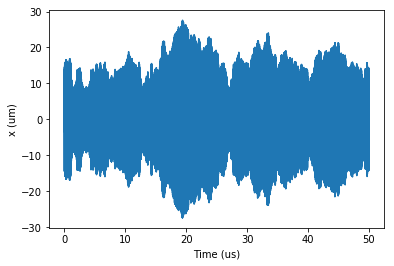

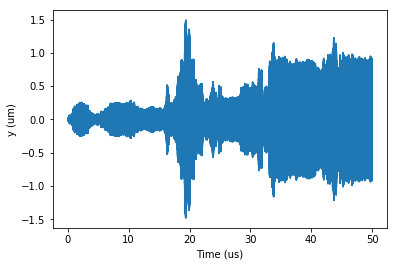

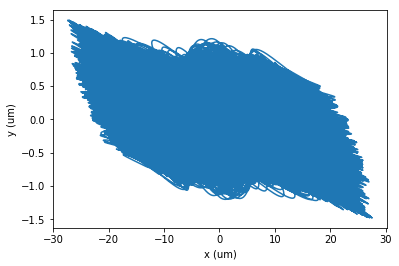

In [42]:
start = time.time()
# simulation configuration
dt = 1.0e-11 #s
t_max = 5.0e-5 # maximum time duration of the simulation

trap_high_f.f = 1.5e9
T = 300.0 # kelvin
rou = 10.0e-6 # distance from initial position to the trap center
phi = 0.0 # direction of initial position vector
v = np.sqrt(2*kB*T/trap_high_f.m)
v = 0.0 #speed
theta = 0.0 # direction of initial velocity

result = trap_high_f.traj(rou, phi, v, theta, dt, t_max)
t_s = np.array(result[0])
x_traj = np.array(result[1])
y_traj = np.array(result[2])

print("x_max = ", x_max*1.0e6, "um")
print("y_max = ", y_max*1.0e6, "um")
print("x_min = ", x_min*1.0e6, "um")
print("y_min = ", y_min*1.0e6, "um")
print("spatial resolution x: ", dx*1.0e6, "um")
print("spatial resolution y: ", dy*1.0e6, "um")
print("Time step for simulation: ", dt*1.0e9, "ns")
end = time.time()
print("time:", end-start)

plt.figure()
plt.plot(t_s*1.0e6, x_traj*1.0e6)
plt.xlabel("Time (us)")
plt.ylabel("x (um)")

plt.figure()
plt.plot(t_s*1.0e6, y_traj*1.0e6)
plt.xlabel("Time (us)")
plt.ylabel("y (um)")

plt.figure()
plt.plot(x_traj*1.0e6, y_traj*1.0e6)
plt.xlabel("x (um)")
plt.ylabel("y (um)")

In [37]:
trap_high_f.f

27000000000.0